### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing dataset

In [3]:
df = pd.read_csv('./datasets/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Extract features from the dataset

In [5]:
x = df.iloc[:, 1:5].values

### Elbow method

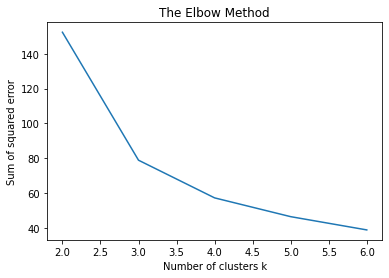

In [6]:
from sklearn.cluster import KMeans
ss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
plt.plot(range(2, 7), ss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared error')
plt.show()

### K-Means clustering with n_clusters = 3

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_values = kmeans.fit_predict(x)

### Cluster assignments

In [8]:
class_0 = df.iloc[cluster_values==0]
class_0.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor


In [9]:
class_1 = df.iloc[cluster_values==1]
class_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
class_2 = df.iloc[cluster_values==2]
class_2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica


Class 0 => Versicolor 

Class 1 => Setosa

Class 3 => Virginica

### Plotting the results

In [10]:
vals = np.concatenate((x, cluster_values.reshape(-1,1)), axis=1)

In [11]:
new_df = pd.DataFrame(vals, columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cluster'])

In [12]:
import seaborn as sns

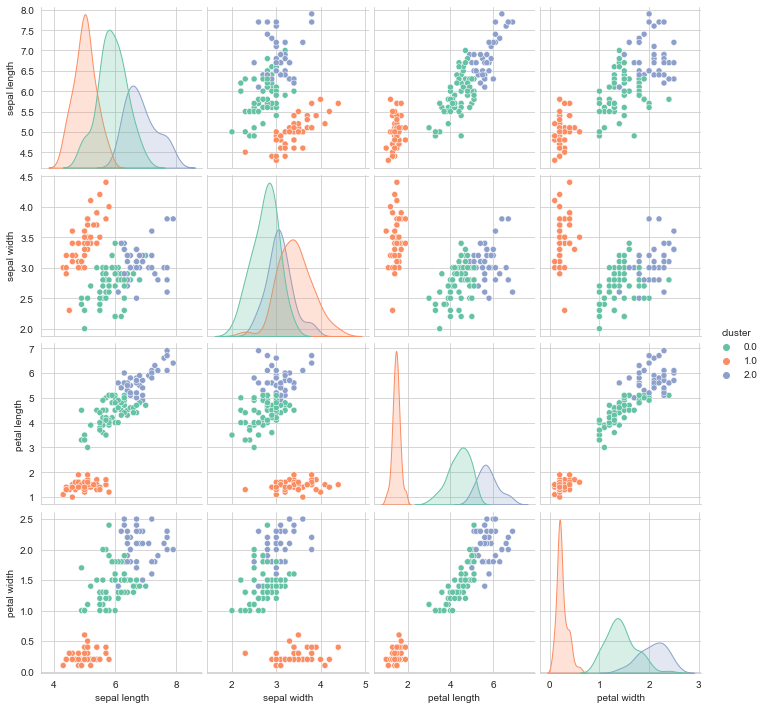

In [13]:
sns.set_style("whitegrid")
sns.pairplot(new_df, hue='cluster', palette="Set2")

### Some Interpretations:

Species belonging to class 1 tends to have relatively lower petal length, petal width and sepal length.

Species belonging to class 2 tends to have relatively higher petal length, petal width and sepal length.

Species belonging to class 0 tends to have these charactersitics lie in the middle.

For all the classes positive correlation is observed between petal width and petal length.

Petal length and petal width significantly contribute in classifying the clusters.

There is some overlapping between class 0 and class 2. They tend to have slightly similar characteristics.

### Plotting cluster centers

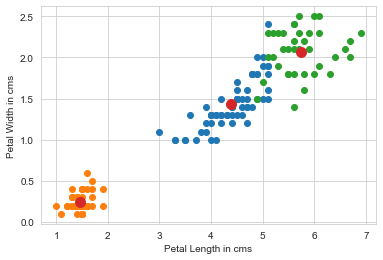

In [41]:
ccx = kmeans.cluster_centers_[:,2]
ccy = kmeans.cluster_centers_[:,3]

plt.scatter(class_0['PetalLengthCm'], class_0['PetalWidthCm'])
plt.scatter(class_1['PetalLengthCm'], class_1['PetalWidthCm'])
plt.scatter(class_2['PetalLengthCm'], class_2['PetalWidthCm'])
plt.scatter(ccx, ccy, s=100)
plt.xlabel('Petal Length in cms')
plt.ylabel('Petal Width in cms')
plt.show()
